In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import missingno as miss 

In [3]:
train = pd.read_csv('../Resources/train.csv')
test = pd.read_csv('../Resources/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#looked at all columns with NA values and the sum  

train[train.columns[train.isna().any()]].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
#realize that some of these columns differ whether the data is discrete or continuous 
print(train['Alley'].unique())
print(train['MasVnrArea'].unique())

[nan 'Grvl' 'Pave']
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e

In [6]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
                
        # Coumn for dtypes
        dtype = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'Data Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# using this table we can identify some rows/ columns that we could delete. such as PoolQC column & the one 
#row of electrical that is missing. 
house_miss = missing_values_table(train)
house_miss

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values,Data Types
PoolQC,1453,99.5,object
MiscFeature,1406,96.3,object
Alley,1369,93.8,object
Fence,1179,80.8,object
FireplaceQu,690,47.3,object
LotFrontage,259,17.7,float64
GarageType,81,5.5,object
GarageYrBlt,81,5.5,float64
GarageFinish,81,5.5,object
GarageQual,81,5.5,object


In [8]:
cols = house_miss[house_miss['% of Total Values']>90].index.tolist()
cols

['PoolQC', 'MiscFeature', 'Alley']

In [9]:
#dropped columns with more than 90% missing values 
train = train.drop(columns=cols)

In [10]:
house_miss = missing_values_table(train)
house_miss

Your selected dataframe has 78 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Fence,1179,80.8,object
FireplaceQu,690,47.3,object
LotFrontage,259,17.7,float64
GarageType,81,5.5,object
GarageYrBlt,81,5.5,float64
GarageFinish,81,5.5,object
GarageQual,81,5.5,object
GarageCond,81,5.5,object
BsmtExposure,38,2.6,object
BsmtFinType2,38,2.6,object


In [11]:
rows = house_miss[house_miss['% of Total Values']<3].index.tolist()
print(rows)

['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'Electrical']


In [12]:
#dropped missing value rows from columns with less than 3% missing values 
train.dropna(subset=rows,inplace=True)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [13]:
house_miss = missing_values_table(train)
house_miss

Your selected dataframe has 78 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Fence,1135,80.4,object
FireplaceQu,657,46.5,object
LotFrontage,251,17.8,float64
GarageType,74,5.2,object
GarageYrBlt,74,5.2,float64
GarageFinish,74,5.2,object
GarageQual,74,5.2,object
GarageCond,74,5.2,object


In [14]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [15]:
#get list of columns with discrete data and missing values 
discrete = house_miss[house_miss['Data Types'] == object].index.tolist()

In [16]:
#changed Nan to 'none'
def change_Nan(df,x): 
    df[x].fillna('none',inplace=True)
    
for na in discrete: 
    change_Nan(train,na)

In [17]:
house_miss = missing_values_table(train)
house_miss

Your selected dataframe has 78 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Data Types
LotFrontage,251,17.8,float64
GarageYrBlt,74,5.2,float64


In [18]:
train['LotFrontage'].mode()

0    60.0
dtype: float64

In [19]:
#used the average year a garage was built to fill in missing values - did this because I hypothesize that the year a garage
# was built is not a very heavily weighted feature in terms of the sales price 
avg_gbuild=train['GarageYrBlt'].mean().round()

In [20]:
train['GarageYrBlt'].fillna(avg_gbuild, inplace=True)

In [21]:
list(train)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enclos

In [22]:
house_miss = missing_values_table(train)
house_miss

Your selected dataframe has 78 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Data Types
LotFrontage,251,17.8,float64


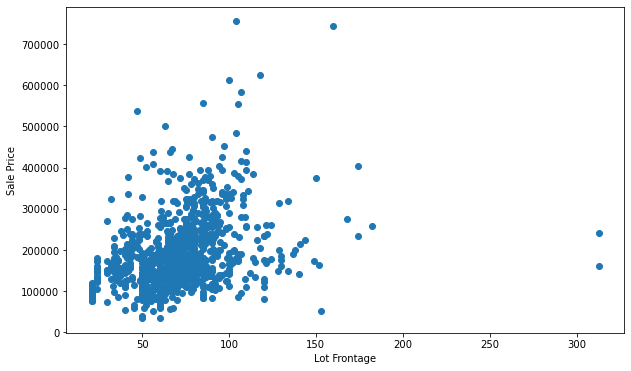

In [23]:
#plotting salesprice against LotFrontage to decide how we want to handle missing values 

fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(x=train.LotFrontage, y = train['SalePrice'])
plt.xlabel("Lot Frontage")
plt.ylabel("Sale Price")
plt.show()

#### It seems that there is some correlation between the Sale Price and the Lot Frontage. 
###### Therefore we may want to use a more in depth strategy to solve our missing values problem.

In [24]:
train_temp = train.copy()
#made a copy of train to manipulate

In [25]:
train_temp.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 78, dtype: object

In [26]:
#dropped na values and selected only numerical values
train_temp.dropna(inplace=True)
lot_x = train_temp.select_dtypes(include=['number'])

In [27]:
#dropped an unneeded ID column and the Y axis series 
lot_x.drop(columns=["Id","LotFrontage"], inplace=True)

C:\Users\holly\anaconda3\envs\DataBoot\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
#set Y value 
lot_y=train_temp['LotFrontage']

In [29]:
from sklearn.neighbors import KNeighborsRegressor as kn 


from sklearn.preprocessing import StandardScaler 
#scaled the X data 
x_scale = StandardScaler().fit(lot_x)
x_scaled=x_scale.transform(lot_x)

k: 1, score: 1.0
k: 3, score: 0.6566171471089219
k: 5, score: 0.5572890395540836
k: 7, score: 0.5056420845366101
k: 9, score: 0.4737473788284057
k: 11, score: 0.45883695982078254
k: 13, score: 0.4434787939062129
k: 15, score: 0.4296029911337115
k: 17, score: 0.4153652090035138
k: 19, score: 0.40492707039368336
k: 21, score: 0.3942821108736224
k: 23, score: 0.39237233727973275
k: 25, score: 0.38819710551637043
k: 27, score: 0.3827474148343647
k: 29, score: 0.379017238935477
k: 31, score: 0.37200205561551136
k: 33, score: 0.36577868372252986
k: 35, score: 0.3623844379951624
k: 37, score: 0.3579983063433215
k: 39, score: 0.3546667170021357
k: 41, score: 0.35057003435247136
k: 43, score: 0.3480687130399962
k: 45, score: 0.3454042957988457
k: 47, score: 0.34179701710899757
k: 49, score: 0.33666583041226794


<function matplotlib.pyplot.show(*args, **kw)>

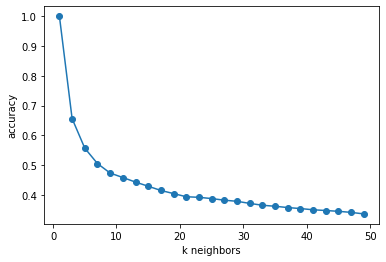

In [30]:
#iterated through k values 
scores = []
for k in range(1,50,2):
    knn = kn(n_neighbors=k) 
    knn.fit(x_scaled,lot_y)
    score = knn.score(x_scaled,lot_y)
    scores.append(score)
    print(f"k: {k}, score: {score}")
plt.plot(range(1,50,2), scores,marker='o')
plt.xlabel("k neighbors")
plt.ylabel("accuracy")
plt.show

##### After plotting and looking at the k values I chose 43 


In [31]:
knn=kn(n_neighbors=43)
knn.fit(x_scaled,lot_y)
knn.score(x_scaled,lot_y)

0.3480687130399962

In [40]:
#created dataframe I wanted to predict on
lots=train[train['LotFrontage'].isna()]

In [41]:
lots=lots.select_dtypes(include=['number'])
lots

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,...,140,0,0,0,176,0,0,9,2008,144000
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,...,0,213,176,0,0,0,0,5,2008,157000
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,...,0,0,0,0,0,0,700,3,2010,149000
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,...,406,90,0,0,0,0,0,5,2010,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,NaN,12546,6,7,1981,1981,310.0,678,...,0,0,99,0,0,0,0,4,2007,182900
1431,1432,120,NaN,4928,6,6,1976,1976,0.0,958,...,0,60,0,0,0,0,0,10,2009,143750
1441,1442,120,NaN,4426,6,5,2004,2004,147.0,697,...,149,0,0,0,0,0,0,5,2008,149300
1443,1444,30,NaN,8854,6,6,1916,1950,0.0,0,...,0,98,0,0,40,0,0,5,2009,121000


In [42]:
lots.drop(columns=["Id"], inplace=True)


In [43]:
#created prediction 
prediction = knn.predict(lots)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
#from original dataframe found the index numbers for each of the missing values 
lot_fill_na=train[train['LotFrontage'].isna()].index
lot_fill_na

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            1407, 1417, 1419, 1423, 1424, 1429, 1431, 1441, 1443, 1446],
           dtype='int64', length=251)

In [45]:
#filled the missing values with the corresponding predictions
train.loc[lot_fill_na,'LotFrontage'] = prediction

NameError: name 'prediction' is not defined

In [46]:
#checked the missing values table and dropped my typo column 
house_miss = missing_values_table(train)
house_miss

Your selected dataframe has 78 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Data Types
LotFrontage,251,17.8,float64


In [47]:
#updated shape of the table
train.shape

(1412, 78)

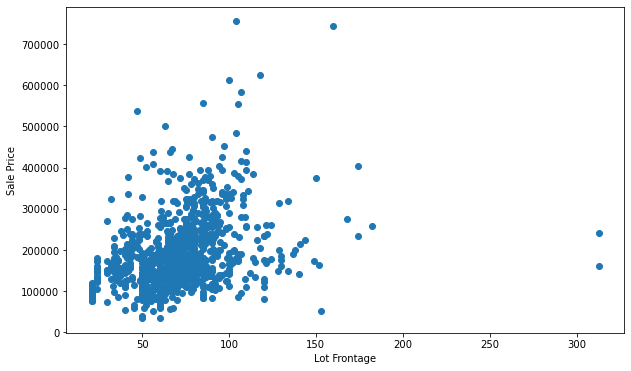

In [48]:
#scatter plot looks to have not been changed much by the additional values. 
#looking at the array of values the dots were placed in a highly populated location - I think this will be alright then to get
#somewhat accurate predictions down the line 
fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(x=train.LotFrontage, y = train['SalePrice'])
plt.xlabel("Lot Frontage")
plt.ylabel("Sale Price")
plt.show()

In [49]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,none,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,4,2010,WD,Normal,142125


In [50]:
train.to_csv("../Resources/train_allvalues.csv",index=False)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1412 non-null   int64  
 1   MSSubClass     1412 non-null   int64  
 2   MSZoning       1412 non-null   object 
 3   LotFrontage    1161 non-null   float64
 4   LotArea        1412 non-null   int64  
 5   Street         1412 non-null   object 
 6   LotShape       1412 non-null   object 
 7   LandContour    1412 non-null   object 
 8   Utilities      1412 non-null   object 
 9   LotConfig      1412 non-null   object 
 10  LandSlope      1412 non-null   object 
 11  Neighborhood   1412 non-null   object 
 12  Condition1     1412 non-null   object 
 13  Condition2     1412 non-null   object 
 14  BldgType       1412 non-null   object 
 15  HouseStyle     1412 non-null   object 
 16  OverallQual    1412 non-null   int64  
 17  OverallCond    1412 non-null   int64  
 18  YearBuil